In [6]:
# General Use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization 
import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

#bd
from sqlalchemy import create_engine

In [10]:
from sqlalchemy import create_engine

# Cambia los valores según tu configuración de PostgreSQL
DB_USER = 'postgres'
DB_PASSWORD = '34353435'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'ia'

# Crear la cadena de conexión
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Crear el motor de la base de datos
engine = create_engine(connection_string)

In [14]:
dfp = pd.read_sql("SELECT cantidad.DV, total.V FROM detalle_venta DV, Venta V where cod_detalleventa.DV=cod_venta.V ",index_col="cod_client")
dfp.head(10) 

TypeError: read_sql() missing 1 required positional argument: 'con'

In [5]:
 df2= dfp[["total", "cod_venta"]]

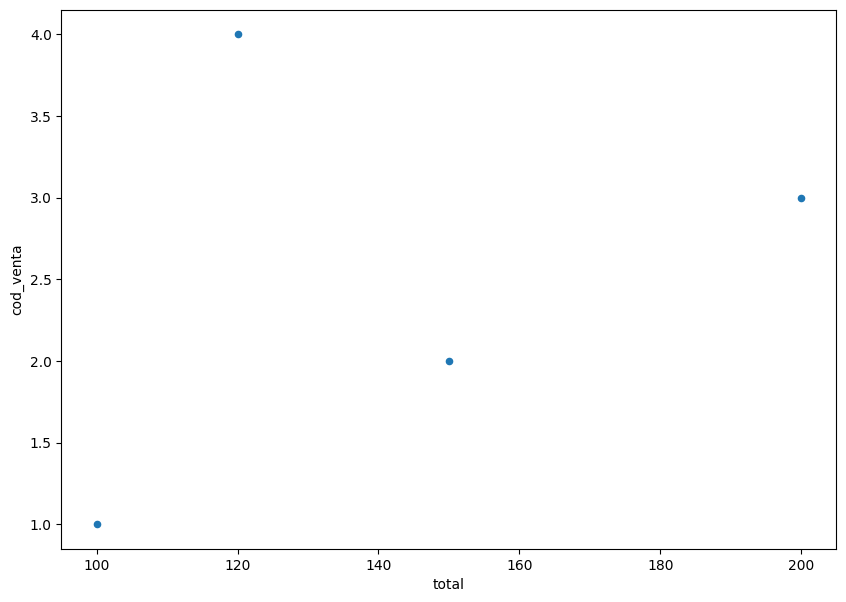

In [6]:
df2.plot(kind="scatter",  # tipo de grafica 
        x="total",
        y="cod_venta",
        figsize=(10, 7))  # tamano de la grafica
plt.show()